In [1]:
import os as os
os.getcwd()
os.chdir('C:\\Users\\Aneetha\\Desktop\\knowledge-base\\Inceptz_DS\\hackathon')

In [32]:
import pandas as pd
 
data = pd.read_csv('Consumer_Complaints.csv',index_col='Complaint ID')
data['year'] = data['Date received'].map(lambda x: x.split("-")[-1] if "-" in x else x.split("/")[-1])
data['month'] = data['Date received'].map(lambda x: x.split("-")[0] if "-" in x else x.split("/")[0])

In [28]:
data.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [34]:
data.describe()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?
count,903983,903983,668823,903983,426386,199970,257981,903983,894758,894705,126038,375434,903983,903983,903983,903983,768575
unique,2176,18,75,166,217,195317,10,4504,62,28785,3,4,6,2125,8,2,2
top,9/8/2017,Mortgage,Other mortgage,"Loan modification,collection,foreclosure",Account status,I am filing this complaint because Experian ha...,Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",CA,300XX,Older American,Consent provided,Web,9/8/2017,Closed with explanation,Yes,No
freq,3551,242194,86633,112315,37056,103,147983,70488,128373,4385,65759,199971,634850,3390,686039,879376,620197


In [33]:
top5_product_issue=data.groupby(['Product'])['Issue'] .count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)

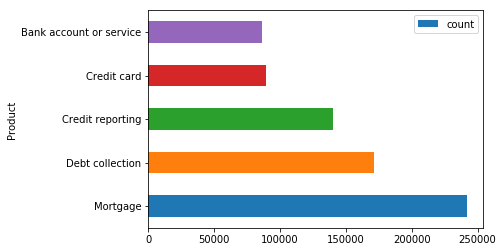

In [35]:
top5_product_issue.plot.barh(x='Product', y='count')

Text(0.5, 1.0, 'Most common medium through which complaints were submitted')

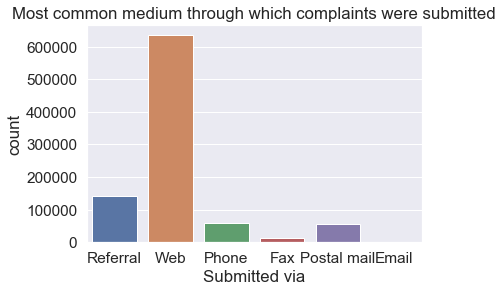

In [66]:
# Most common medium through which complaints were submitted
sns.countplot(x ='Submitted via', data = data) 
plt.title("Most common medium through which complaints were submitted")

Text(0.5, 1.0, 'Complaints over the Year')

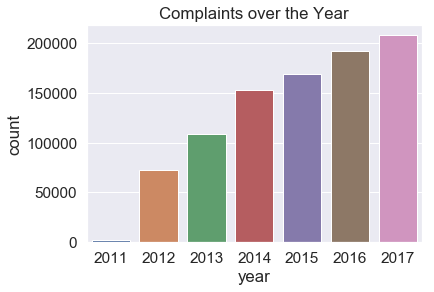

In [83]:
# 4. Which months received most complaints throughout the period of dataset (2011-17 - 2011 is an outlier) -will help us identify if it is close to tax season or financial year-end etc.

import seaborn as sns
sns.countplot(x ='year', data = data) 
plt.title("Complaints over the Year")

In [71]:
#Top 5 company in resposning customer
top5_company_timely_response=data.groupby(['Company'])['Timely response?'] .count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)
top5_company_timely_response.plot.barh(x='Company', y='count')
plt.title("Top 5 Company reponded timely")

Text(0.5, 1.0, 'Top 5 Company reponded timely')

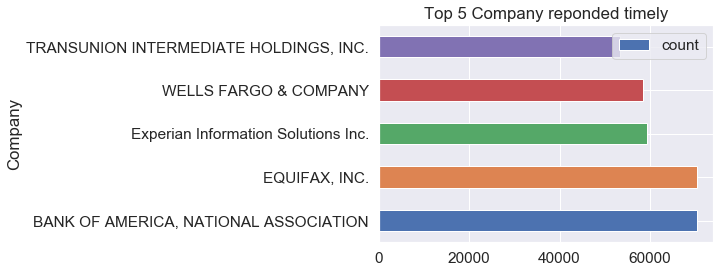

Text(0.5, 1.0, 'Top 5 company over issue')

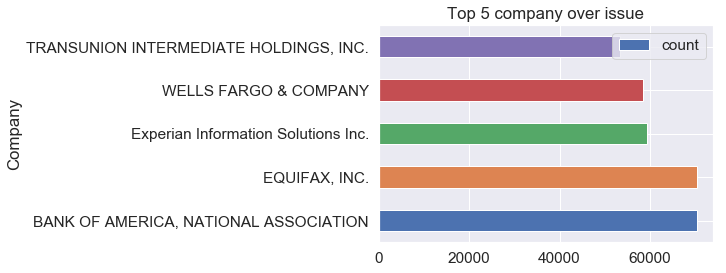

In [69]:
#Top 5 company over issue
top5_company_issue=data.groupby(['Company'])['Issue'] .count().reset_index(name='count').sort_values(['count'], ascending=False).head(5)
top5_company_issue.plot.barh(x='Company', y='count')
plt.title("Top 5 company over issue")

Text(0.5, 1.0, 'Most complained Compay')

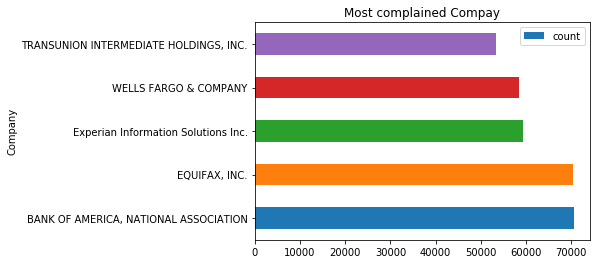

In [44]:
top5_company_issue.plot.barh(x='Company', y='count')
plt.title("Top 5 complained Company")

In [39]:
top5_bank_product_issue  = pd.merge(top5_product_issue, data, how='inner', on = 'Product')

In [40]:
top5_bank_product_issue.groupby

,Product,count,Date received,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,year,month
0,Mortgage,242194,3/12/2014,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,M&T BANK CORPORATION,MI,48382,NaN,NaN,Referral,3/17/2014,Closed with explanation,Yes,No,2014,3
1,Mortgage,242194,11/13/2013,Conventional adjustable mortgage (ARM),"Loan servicing, payments, escrow account",NaN,NaN,NaN,U.S. BANCORP,MN,48322,NaN,NaN,Phone,11/20/2013,Closed with monetary relief,Yes,No,2013,11
2,Mortgage,242194,11/13/2015,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Aldridge Pite, LLP",CA,93101,NaN,NaN,Referral,12/10/2015,Closed with explanation,Yes,Yes,2015,11
3,Mortgage,242194,10/21/2014,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,OCWEN LOAN SERVICING LLC,FL,32714,Older American,NaN,Web,10/21/2014,Closed with explanation,Yes,No,2014,10
4,Mortgage,242194,4/14/2017,Other mortgage,"Loan modification,collection,foreclosure",NaN,NaN,Company believes it acted appropriately as aut...,"Shellpoint Partners, LLC",CA,90305,NaN,NaN,Referral,4/14/2017,Closed with explanation,Yes,No,2017,4
5,Mortgage,242194,11/7/2014,Conventional fixed mortgage,"Loan modification,collection,foreclosure",NaN,NaN,NaN,U.S. BANCORP,MT,59801,NaN,NaN,Web,11/7/2014,Closed with explanation,Yes,No,2014,11
6,Mortgage,242194,4/17/2015,FHA mortgage,"Application, originator, mortgage broker",NaN,NaN,NaN,WELLS FARGO & COMPANY,ME,4032,NaN,Consent not provided,Web,4/17/2015,Closed with explanation,Yes,No,2015,4
7,Mortgage,242194,3/8/2012,Other mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,Ditech Financial LLC,CA,95361,NaN,NaN,Web,3/23/2012,Closed without relief,Yes,No,2012,3
8,Mortgage,242194,3/27/2013,Conventional fixed mortgage,"Loan servicing, payments, escrow account",NaN,NaN,NaN,NATIONSTAR MORTGAGE,WA,98203,NaN,NaN,Web,3/27/2013,Closed with explanation,Yes,No,2013,3
9,Mortgage,242194,11/18/2016,Conventional fixed mortgage,Settlement process and costs,NaN,Started the refinance of home mortgage process...,NaN,AMERICAN NEIGHBORHOOD MORTGAGE,NJ,088XX,NaN,Consent provided,Web,11/21/2016,Closed with monetary relief,No,No,2016,11


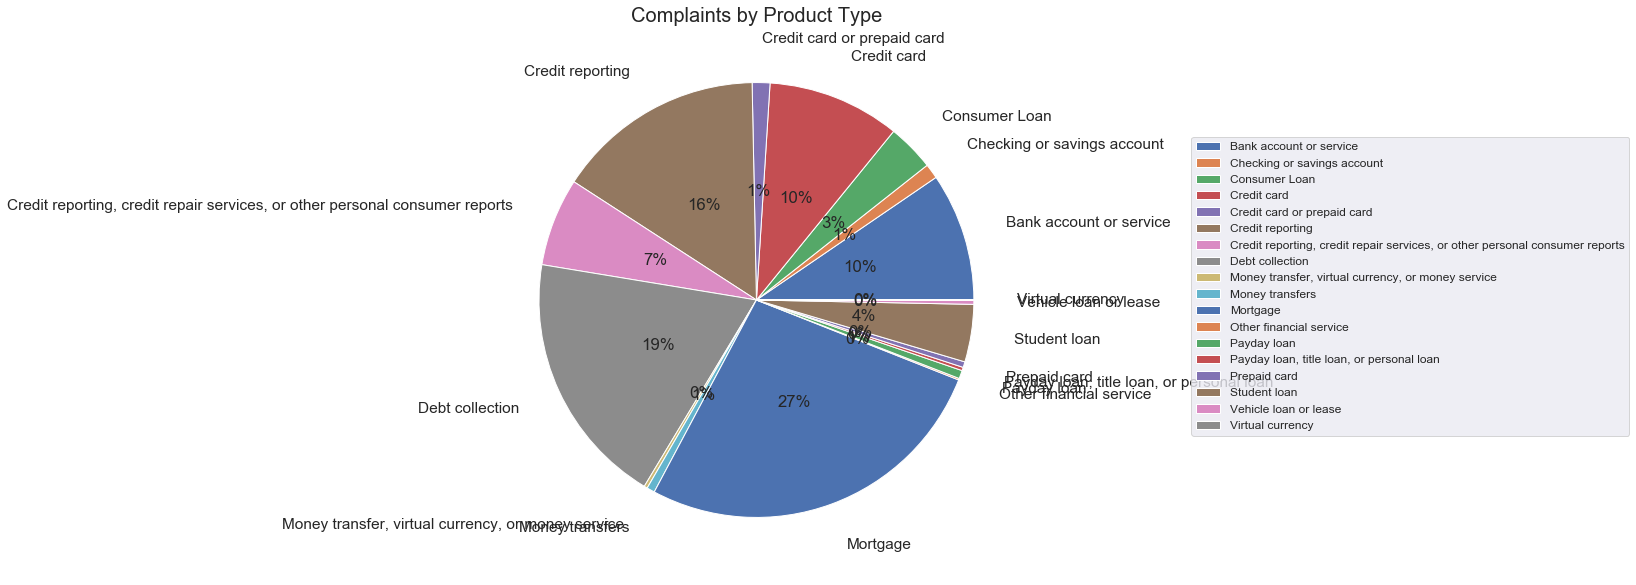

In [70]:

product_size = data.groupby(['Product']).size()
ax = product_size.plot.pie(y='Product', figsize=(10, 10),  autopct='%1.0f%%',pctdistance=0.5, labeldistance=1.2)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, bbox_to_anchor=(1.3, 0.8), loc=2, borderaxespad=0., fontsize=12)

plt.ylabel(' ')
plt.title('Complaints by Product Type', fontsize=20)
plt.show();


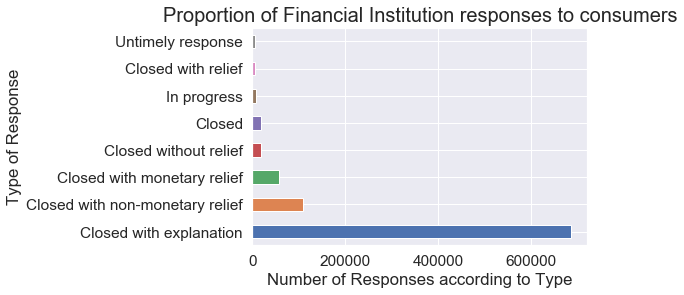

In [86]:

df_company_response = data['Company response to consumer'].value_counts()
df_company_response = data['Company response to consumer'].value_counts()
df_company_response.plot(kind='barh')
plt.title('Proportion of Financial Institution responses to consumers', fontsize=20)
plt.xlabel('Number of Responses according to Type')
plt.ylabel('Type of Response')
plt.show();

In [80]:
df_group_month = df.groupby(['date_received']).product.count().reset_index()
df_group_month.set_index('date_received', inplace=True)
df_group_month = df_group_month['product'].resample('MS').sum()
df_group_month.plot(figsize=(15, 8), linewidth=3)
plt.title("Number of Complaints over time")
plt.xlabel("Date")
plt.ylabel("Number of Complaints")
plt.show()

Closed with explanation            686039
Closed with non-monetary relief    108436
Closed with monetary relief         57090
Closed without relief               17868
Closed                              17611
In progress                          7015
Closed with relief                   5304
Untimely response                    4620
Name: Company response to consumer, dtype: int64